Pending Update:
- [ ] check whether the y is mmol, if it is, times 22.4 to convert the value to cm^3
- [ ] need to have the forward dots to be filled while the backward dots to be empty
- [ ] able to convert from gravimetric to volumetric 
- [x] customize output names to fileame + '.png'
- [x] able to include BET SA on the isotherm plot
- [ ] feed in all the files in the same folder

In [4]:
def sorption_data_to_pngs(filename):
    import matplotlib.pyplot as plt
    import csv
    import re
    import pandas as pd
    try:
        df = pd.read_excel(filename)
    except:
        df = pd.read_excel(filename,encoding='cp1252')

    #Rename all the columns in to numbers
    rename_col = []
    for index, value in enumerate(df.columns):
        rename_col.append(str(index))
    df.columns = rename_col

    Global_pivot  = df[df.eq('Summary Report').any(1)]
    Global_pivot.index
    df.loc[Global_pivot.index,:]

    #find the corresponding column "indices" and now you can extract the columns by 'SA_pivot.index', 'ISO_pivot.index', and 'PV_pivot.index'
    T_df = df.loc[Global_pivot.index,:].T
    SA_pivot = T_df[T_df.eq('Summary Report').any(1)]
    ISO_pivot = T_df[T_df.eq('Isotherm Tabular Report').any(1)]
    PV_pivot = T_df[T_df.eq('dV/dlog(W) Pore Volume vs. Pore Width').any(1)]

    #sa, iso and pv columns I want
    sa_name = re.sub('\D','',str(SA_pivot.index))
    sa_value = str(int(sa_name) + 1)
    iso_x = re.sub('\D','',str(ISO_pivot.index))
    iso_y = str(int(iso_x) + 2)
    pv_x = re.sub('\D','',str(PV_pivot.index))
    pv_y = str(int(pv_x) + 1)

    #Up to this point, I can call out the correspondig columns by raw_sa = df[[sa_name, sa_value]] and change the sa_name 
    #into iso_x, etc

    #sanity check
    # print('sa columns of interest are', sa_name, 'and', sa_value)
    # print('iso columns of interest are', iso_x, 'and', iso_y)
    # print('pv columns of interest are', pv_x, 'and', pv_y)
    
    #extract surface area, isotherm, and pore volumn; may need to check the indexes if different reports were generated
    raw_sa = df[[sa_name,sa_value]]

    raw_pv = df[[pv_x,pv_y]]

    #display surface area
    raw_sa
    sa_row  = raw_sa[raw_sa.eq('BET Surface Area:').any(1)]
    BET_SA = str(sa_row.loc[32][0]+' '+ sa_row.loc[32][1])
    
    #Isotherm Plot
    #extract the x (p/p0) and y (Quantity Adsorbed (cm^3/g)) values for isotherm
    raw_iso = df[[iso_x,iso_y]] 

    #clean the raw data with only data left, i.e. dropped the empty entry
    raw_iso = raw_iso.dropna()
    #Find the index of Pore Width  and dV/dlog row

    raw_iso = raw_iso.reset_index()
    index = raw_iso.index
    condition = raw_iso[iso_x] == "Relative Pressure (p/p°)"
    x_indices = index[condition]
    #get only rows with "Relative Pressure (p/p°)"
    x_indices_list = x_indices.tolist()
    raw_iso = raw_iso.loc[int(x_indices_list[0])+1:,:]

    #clean raw so it only left with the header and x, y
    raw_iso = raw_iso.reset_index()
    clean_iso = raw_iso[[iso_x, iso_y]]
    clean_iso = clean_iso.rename(columns={iso_x: "x", iso_y: "y"})

    #Pore Volumn
    #extract the x (Pore Width) and y (dV/dlog (cm^3/g)) values for pore volumn
    raw_pv = df[[pv_x, pv_y]]
    #clean the raw data with only data left, i.e. dropped the empty entry
    raw_pv = raw_pv.dropna()
    #Find the index of Pore Width  and dV/dlog row
    raw_pv = raw_pv.reset_index()
    index = raw_pv.index
    condition = raw_pv[pv_x] == "Pore Width (Å)"
    x_indices = index[condition]
    #get only rows with "Pore Width (Å)"
    x_indices_list = x_indices.tolist()
    raw_pv = raw_pv.loc[int(x_indices_list[0])+1:,:]
    #clean raw so it only left with the header and x, y
    raw_pv = raw_pv.reset_index()
    clean_pv = raw_pv[[pv_x, pv_y]]
    clean_pv = clean_pv.rename(columns={pv_x: "x", pv_y: "y"})

    iso = clean_iso.plot(x='x',y='y',
                   kind = 'scatter',
                   title='N$\mathregular{_{2}}$ Isotherm',
                   xlabel = 'Relative Pressure (p/p°)',
                   ylabel = 'Quantity Adsorbed (cm³/g)',
                   xlim = (0,1),
                   ylim = (clean_iso.min().y, clean_iso.max().y * 1.2),
                   label = filename.replace('.XLS','')
                  )
    iso.text(0.1, clean_iso.min().y * 1.5, BET_SA)
    plt.savefig(filename.replace('.XLS','') + 'iso.png')
    clean_pv.plot(x='x',y='y',
                  kind = 'line',
                  title='Pore Volume',
                  xlabel = 'Pore Width (Å)',
                  ylabel = 'dV/dlog(W) Pore Volume (cm³/g)',
                  xlim = (5,40),
                  ylim = (clean_pv.min().y, clean_pv.max().y * 1.1),
                  label = filename.replace('.XLS','')
                  )
    plt.savefig(filename.replace('.XLS','') + 'pv.png')


In [5]:
def getfilename():
    import os
    path = os.getcwd()    
    filewithext = []
    filename = []
    for file in [doc for doc in os.listdir(path) if doc.endswith('.XLS')]:  
        filewithext.append(file)
        filename.append(file.replace(".XLS",""))
    return(filewithext, filename)


[None, None, None]

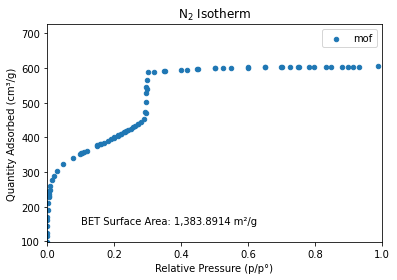

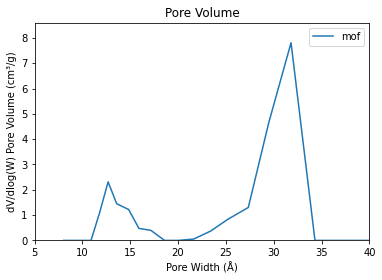

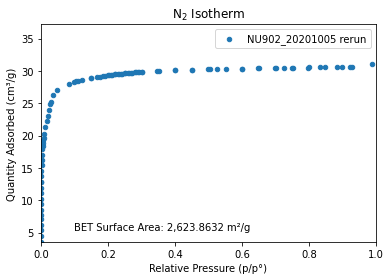

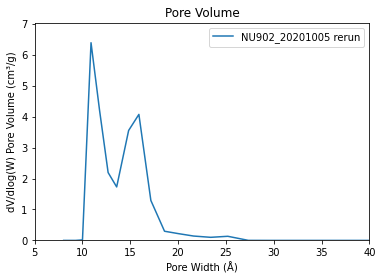

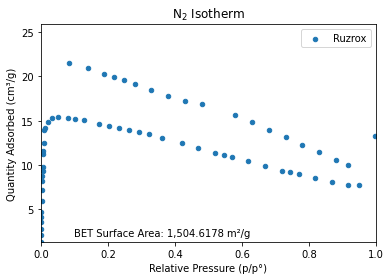

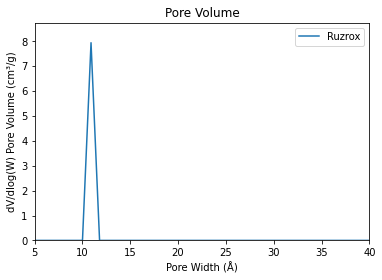

In [6]:
[sorption_data_to_pngs(filename) for filename in getfilename()[0]]